In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('superstore_dataset2011-2015.csv',encoding='iso-8859-1')
df.head()

,Row ID,Order ID,Order_Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [48]:
#異常處理
##處理缺失值
df.drop(['Postal Code'],axis = 1,inplace = True)

In [49]:
#時間轉換成datetime 
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
#新增年和月
df['year'] = df['Order_Date'].dt.year
df['month'] = df['Order_Date'].values.astype('datetime64[M]')

d:\Wei\python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-01-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
d:\Wei\python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
d:\Wei\python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-01-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
d:\Wei\python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent 

In [50]:
#分析銷售狀況
sales_data = df[['Order_Date','Sales','Quantity','Profit','year','month']]

#按照年月來分類銷售數據
sales_year = sales_data.groupby(['year','month']).sum()

#依照年份的銷售數據
year_2011 = sales_year.loc[(2011,slice(None)),:].reset_index()
year_2011 = sales_year.loc[(2011,slice(None)),:].reset_index()
year_2012 = sales_year.loc[(2012,slice(None)),:].reset_index()
year_2013 = sales_year.loc[(2013,slice(None)),:].reset_index()
year_2014 = sales_year.loc[(2014,slice(None)),:].reset_index()

In [51]:
#data frame
sales = pd.concat([year_2011['Sales'],year_2012['Sales'],
                 year_2013['Sales'],year_2014['Sales']],axis=1)
#整理報表
sales.index = ['Jau','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sales.columns = ['Sales-2011','Sales-2012','Sales-2013','Sales-2014']
#製作熱力圖
sales.style.background_gradient()

,Sales-2011,Sales-2012,Sales-2013,Sales-2014
Jau,138241.300420,162800.893380,206459.195820,268265.522400
Feb,134969.940860,152661.151440,191062.772160,244159.304860
Mar,171455.593720,201608.727840,230547.794680,347720.968680
Apr,128833.470340,187469.961920,233181.348440,302132.540000
May,148146.720920,218960.160420,304509.963360,304798.836040
Jun,189338.439660,249289.771720,341162.343700,372577.232980
Jul,162034.697560,174394.028080,223642.656640,278672.173260
Aug,219223.495240,271669.660860,323876.607160,432731.041940
Sep,255237.896980,256567.853080,326897.270440,405436.705840
Oct,204675.078460,239321.099040,270121.875700,406659.415000


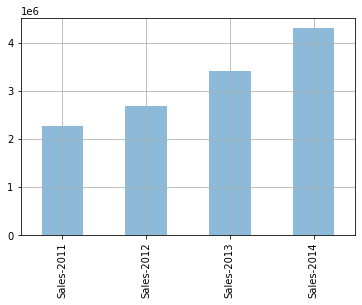

In [52]:
#計算年度銷售額(柱狀圖)
sales_sum = sales.sum()
sales_sum.plot(kind = 'bar', alpha = 0.5)
plt.grid()

<AxesSubplot:>

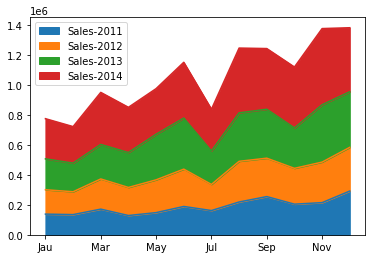

In [53]:
#計算成長率
rise1 = sales_sum[1]/sales_sum[0] - 1
rise2 = sales_sum[2]/sales_sum[1] - 1
rise3 = sales_sum[3]/sales_sum[2] - 1
rise = [0,rise1,rise2,rise3]
#data frame
sales_table = pd.DataFrame({'sales_sum':sales_sum, 'rise_rate':rise})
#各年度銷售額(堆積圖)
sales.plot.area()

In [54]:
#分析銷售量
#data frame
quantity = pd.concat([year_2011['Quantity'], year_2012['Quantity'], year_2013['Quantity'], year_2014['Quantity']], axis=1)
#整理報表
quantity.index = ['Jau','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
quantity.columns = ['Quantity_2011','Quantity_2012','Quantity_2013','Quantity_2014']
#熱力圖
quantity.style.background_gradient()

,Quantity_2011,Quantity_2012,Quantity_2013,Quantity_2014
Jau,2178,2150,2766,3656
Feb,1794,2156,2535,3450
Mar,2183,2880,3130,4820
Apr,2181,2506,3161,4397
May,2057,3239,4115,4415
Jun,2715,3508,4948,5528
Jul,2266,2551,3594,3867
Aug,2909,3451,4564,5506
Sep,3357,3752,5067,5741
Oct,2615,3399,3977,5915


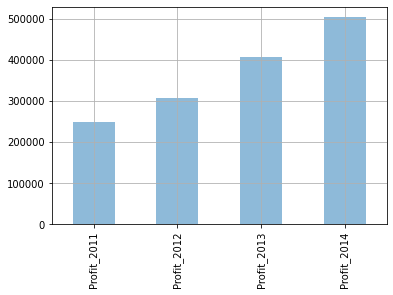

In [55]:
#分析利潤狀況(柱狀圖)
profit=pd.concat([year_2011['Profit'],year_2012['Profit'],
                 year_2013['Profit'],year_2014['Profit']],axis=1)
profit.columns=['Profit_2011', 'Profit_2012', 'Profit_2013', 'Profit_2014']

profit_sum=profit.sum()
profit_sum.plot(kind='bar',alpha=0.5)
plt.grid()

In [56]:
#銷售額、利潤、成長率分析報表
profit_rate = np.array(profit_sum)/ np.array(sales_sum)
profit_rate1 = pd.Series(profit_rate,index = [2011, 2012, 2013, 2014])
profit_sum1 = pd.Series(np.array(profit_sum),index = [2011, 2012, 2013, 2014])
sales_sum1 = pd.Series(np.array(sales_sum),index = [2011, 2012, 2013, 2014])

#合併Series
profit_table = pd.concat([profit_sum1,sales_sum1,profit_rate1],axis = 1)
profit_table.columns = ['profit_sum','sales_sum','profit_rate']
profit_table

,profit_sum,sales_sum,profit_rate
2011,248940.81154,2.259451e+06,0.110178
2012,307415.27910,2.677439e+06,0.114817
2013,406935.23018,3.405746e+06,0.119485
2014,504165.97046,4.299866e+06,0.117252


In [95]:
# 客單價
## 2011 - 2014 年客單價
for i in range(2011,2015):
    df2 = df[df['year'] == i]
    price = df2[['Order_Date','Customer ID','Sales']]
    
    # 計算總消費次數
    price_dr = price.drop_duplicates(subset = ['Order_Date','Customer ID'])
    total_num = price_dr.shape[0]
    print('{}年總消費次數：'.format(i),total_num)
    
    # 客單價
    unit_price = price['Sales'].sum()/total_num
    print('{}年客單價：'.format(i),unit_price,'\n')


2011年總消費次數： 4453
2011年客單價： 507.3997070604087 

2012年總消費次數： 5392
2012年客單價： 496.55762136498515 

2013年總消費次數： 6753
2013年客單價： 504.3308824788983 

2014年總消費次數： 8696
2014年客單價： 494.4647965225391 



In [58]:
# 產品市場概況
Market_Year_Sales = df.groupby(['Market', 'year']).agg({'Sales':'sum'}).reset_index().rename(columns={'Sales':'Sales_amounts'})
Market_Year_Sales.head()


,Market,year,Sales_amounts
0,APAC,2011,6.392453e+05
1,APAC,2012,7.627193e+05
2,APAC,2013,9.745809e+05
3,APAC,2014,1.209199e+06
4,Africa,2011,1.271873e+05


Text(0.5, 1.0, 'Market sales 2011-2014 ')

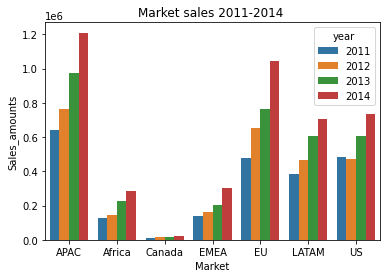

In [59]:
#各地區銷售狀況
sns.barplot(x='Market', y='Sales_amounts', hue='year', data = Market_Year_Sales)
plt.title('Market sales 2011-2014 ')

In [60]:
#各地區銷售額占總銷售額比率
Market_Sales = df.groupby(['Market']).agg({'Sales':'sum'})
Market_Sales["percent"] = Market_Sales["Sales"] / df["Sales"].sum()
Market_Sales.style.background_gradient()

,Sales,percent
Market,,
APAC,3585744.129000,0.283626
Africa,783773.211000,0.061995
Canada,66928.170000,0.005294
EMEA,806161.311000,0.063766
EU,2938089.061500,0.232398
LATAM,2164605.167080,0.171217
US,2297200.860300,0.181705


In [61]:
## 銷售量TOP10產品
productId_count = df.groupby('Product ID').count()['Customer ID'].sort_values(ascending=False)
print(productId_count.head(10))

## 銷售額TOP10產品
productId_amount = df.groupby('Product ID').sum()['Sales'].sort_values(ascending=False)
print(productId_amount.head(10))

## 利潤TOP10產品
productId_Profit= df.groupby('Product ID').sum()['Profit'].sort_values(ascending=False)
print(productId_Profit.head(10))

Product ID
OFF-AR-10003651    35
OFF-AR-10003829    31
OFF-BI-10002799    30
OFF-BI-10003708    30
FUR-CH-10003354    28
OFF-BI-10002570    27
OFF-BI-10004140    25
OFF-BI-10004195    24
OFF-BI-10003650    24
OFF-BI-10004632    24
Name: Customer ID, dtype: int64
Product ID
TEC-CO-10004722    61599.8240
TEC-PH-10004664    30041.5482
OFF-BI-10003527    27453.3840
TEC-MA-10002412    22638.4800
TEC-PH-10004823    22262.1000
FUR-CH-10002024    21870.5760
FUR-CH-10000027    21329.7300
OFF-AP-10004512    21147.0840
FUR-TA-10001889    20730.7557
OFF-BI-10001359    19823.4790
Name: Sales, dtype: float64
Product ID
TEC-CO-10004722    25199.9280
OFF-AP-10004512    10345.5840
TEC-PH-10004823     8121.4800
OFF-BI-10003527     7753.0390
TEC-CO-10001449     6983.8836
FUR-CH-10002250     6123.2553
TEC-PH-10004664     5455.9482
OFF-AP-10002330     5452.4640
TEC-PH-10000303     5356.8060
FUR-CH-10002203     5003.1000
Name: Profit, dtype: float64


In [62]:
#商種種類銷售情況
#重新定義種類(因為原本的分類太細)
df['Category Sub Category'] = df[['Category','Sub-Category']].apply(lambda x:str(x[0])+'_'+str(x[1]),axis=1)
#依照新定義的統計銷售額和利潤
df_Category_Sub_Category=df.groupby("Category Sub Category").agg({"Profit":"sum","Sales":"sum"}).reset_index()
#依照銷售額排序
df_Category_Sub_Category.sort_values(by=["Sales"],ascending=False, inplace=True)
# 種類的 cumsum():累計百分比
df_Category_Sub_Category['cum percent'] = df_Category_Sub_Category['Sales'].cumsum()/df_Category_Sub_Category['Sales'].sum()
df_Category_Sub_Category

,Category Sub Category,Profit,Sales,cum percent
16,Technology_Phones,216717.00580,1.706824e+06,0.135007
14,Technology_Copiers,258567.54818,1.509436e+06,0.254401
1,Furniture_Chairs,140396.26750,1.501682e+06,0.373181
0,Furniture_Bookcases,161924.41950,1.466572e+06,0.489184
11,Office Supplies_Storage,108461.48980,1.127086e+06,0.578335
4,Office Supplies_Appliances,141680.58940,1.011064e+06,0.658308
15,Technology_Machines,58867.87300,7.790601e+05,0.719931
3,Furniture_Tables,-64083.38870,7.570419e+05,0.779811
13,Technology_Accessories,129626.30620,7.492370e+05,0.839075
6,Office Supplies_Binders,72449.84600,4.619115e+05,0.875611


<AxesSubplot:ylabel='Segment'>

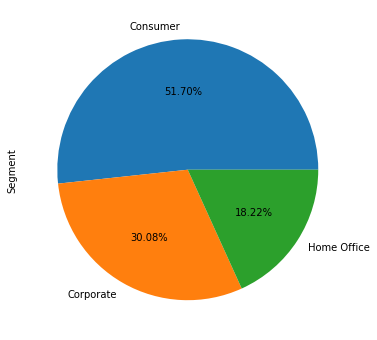

In [64]:
## 不同類型的客戶佔比
df["Segment"].value_counts().plot(kind='pie', autopct='%.2f%%', shadow=False, figsize=(14, 6))

Text(0.5, 1.0, '2011-2014 Segment Customer')

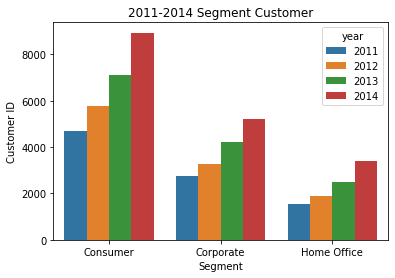

In [6]:
#年度顧客類型比較
Segment_Year = df.groupby(["Segment", 'year']).agg({'Customer ID':'count'}).reset_index()
sns.barplot(x='Segment', y='Customer ID', hue='year', data = Segment_Year)
plt.title('2011-2014 Segment Customer')

Text(0.5, 1.0, '2011-2014 Segment Sales')

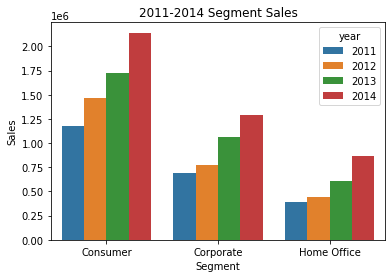

In [65]:
#各類型顧客消費狀況
Segment_sales = df.groupby(["Segment", 'year']).agg({'Sales':'sum'}).reset_index()
sns.barplot(x='Segment', y='Sales', hue='year', data = Segment_sales)
plt.title('2011-2014 Segment Sales')


In [66]:
#消費者購買情況
grouped_Customer = df[['Customer ID','Order_Date', 
          'Quantity', 'Sales', 'month']].sort_values(['Order_Date']).groupby('Customer ID')
grouped_Customer.head()

,Customer ID,Order_Date,Quantity,Sales,month
0,TB-11280,2011-01-01,2,408.300,2011-01-01
1,JH-15985,2011-01-01,3,120.366,2011-01-01
2,AT-735,2011-01-01,4,66.120,2011-01-01
3,EM-14140,2011-01-01,3,44.865,2011-01-01
4,JH-15985,2011-01-01,5,113.670,2011-01-01
...,...,...,...,...,...
43838,AD-180,2014-12-26,4,275.712,2014-12-01
43902,DB-3555,2014-12-26,1,18.180,2014-12-01
43878,AD-180,2014-12-26,2,158.760,2014-12-01
43914,AD-180,2014-12-26,2,4.272,2014-12-01


In [84]:
# RFM分析
rfm = df.pivot_table(index='Customer ID',
                    values = ["Order ID","Sales","Order_Date"],
              aggfunc={"Order ID":"count","Sales":"sum","Order_Date":"max"})
# R:上次消費的日期，每筆交易時間間隔 ，以資料最大的日期（2014-12-31）作為分析的基準日期
rfm['R'] = (rfm.Order_Date.max() - rfm.Order_Date)/np.timedelta64(1,'D')
# F:計算交易次數，M:銷售金額
rfm.rename(columns={'Order ID':'F','Sales':'M'},inplace = True)

#比較每個顧客和平均值的差異
rfm[['R','F','M']].apply(lambda x:x-x.mean())


,R,F,M
Customer ID,,,
AA-10315,-79.616981,9.742138,5796.153937
AA-10375,-81.616981,9.742138,-2067.064063
AA-10480,29.383019,5.742138,9744.330717
AA-10645,-61.616981,40.742138,7392.631637
AA-315,-85.616981,-24.257862,-5708.003063
...,...,...,...
YS-21880,-78.616981,21.742138,10752.346937
ZC-11910,112.383019,-31.257862,-7944.086063
ZC-21910,-84.616981,51.742138,20521.560197


In [93]:
def rfm_func(x):
    level =x.apply(lambda x:'1'if x>0 else '0')
    level =level.R +level.F +level.M
    d = {
        "111":"VIP 客戶",
        "011":"重要保持客戶",
        "101":"重要挽留客戶",
        "001":"重要發展客戶",
        "110":"一般價值客戶",
        "010":"一般保持客户",
        "100":"一般挽留客户",
        "000":"一般發展客户"
    }
    result = d[level]
    return result
# 控制函数的輸入值是原有數據的每一行
rfm['label']= rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis =1)
rfm


,F,Order_Date,M,R,label,color
Customer ID,,,,,,
AA-10315,42,2014-12-23,13747.41300,8.0,重要保持客戶,r
AA-10375,42,2014-12-25,5884.19500,6.0,一般保持客户,r
AA-10480,38,2014-09-05,17695.58978,117.0,VIP 客戶,g
AA-10645,73,2014-12-05,15343.89070,26.0,重要保持客戶,r
AA-315,8,2014-12-29,2243.25600,2.0,一般發展客户,r
...,...,...,...,...,...,...
YS-21880,54,2014-12-22,18703.60600,9.0,重要保持客戶,r
ZC-11910,1,2014-06-14,7.17300,200.0,一般挽留客户,r
ZC-21910,84,2014-12-28,28472.81926,3.0,重要保持客戶,r


<AxesSubplot:xlabel='F', ylabel='R'>

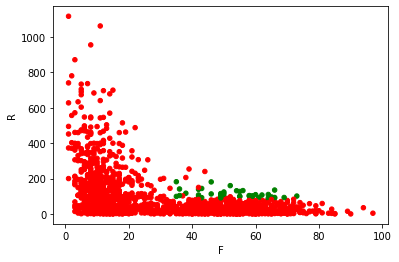

In [111]:
# VIP 客戶
rfm.loc[rfm.label=='VIP 客戶','color']='g'
rfm.loc[~(rfm.label=='VIP 客戶'),'color']='r'
rfm.plot.scatter('F','R',c = rfm.color)

In [89]:
# 新用户、活跃用户、不活跃用户和回归用户分析
## pivot_table 统计 顾客id 每个月 的购买次数
pivoted_counts = df.pivot_table(index= 'Customer ID',
                               columns= 'month',
                               values= 'Order_Date',
                               aggfunc= 'count').fillna(0)
# 大于一次的全部设为1
df_purchase = pivoted_counts.applymap(lambda x:1 if x>0 else 0)
df_purchase.head()

month,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,...,2014-03-01,2014-04-01,2014-05-01,2014-06-01,2014-07-01,2014-08-01,2014-09-01,2014-10-01,2014-11-01,2014-12-01
Customer ID,,,,,,,,,,,,,,,,,,,,,
AA-10315,0,0,1,1,0,0,0,0,1,0,...,0,1,0,1,1,1,0,0,0,1
AA-10375,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,1,1
AA-10480,1,0,1,1,0,1,0,1,0,0,...,1,1,1,0,0,1,1,0,0,0
AA-10645,1,0,0,1,0,1,1,0,0,0,...,1,1,0,1,0,0,0,1,1,1
AA-315,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1


In [ ]:
# 最後依照RFM分群去找出各族群主力產品